## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Optimization Trial 1




In [ ]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME', and 'SPECIAL_CONSIDERATIONS'.
application_df_dropped_opt_1 = application_df.drop(columns=['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS'])

In [ ]:
# Determine the number of unique values in each column.
unique_values_opt_1 = application_df_dropped_opt_1.nunique()

In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts_opt_1 = application_df_dropped_opt_1['APPLICATION_TYPE'].value_counts()
print(application_type_counts_opt_1)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value_type_opt_1 = 500
application_types_to_replace_opt_1 = application_type_counts_opt_1[application_type_counts_opt_1 < cutoff_value_type_opt_1].index.tolist()

# Replace in dataframe
for app in application_types_to_replace_opt_1:
    application_df_dropped_opt_1['APPLICATION_TYPE'] = application_df_dropped_opt_1['APPLICATION_TYPE'].replace(app,"Other")

print(application_type_counts_opt_1)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classification_counts_opt_1 = application_df_dropped_opt_1['CLASSIFICATION'].value_counts()
# Choosing a cutoff value and create a list of classifications to be replaced
cutoff_value_class_opt_1 = 1000
classifications_to_replace_opt_1 = classification_counts_opt_1[classification_counts_opt_1 < cutoff_value_class_opt_1].index.tolist()
# Replace in dataframe
for cls in classifications_to_replace_opt_1:
    application_df_dropped_opt_1['CLASSIFICATION'] = application_df_dropped_opt_1['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df_dropped_opt_1['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`

application_df_dropped_opt_1 = pd.get_dummies(application_df_dropped_opt_1)

In [ ]:
# Split our preprocessed data into our features and target arrays

X = application_df_dropped_opt_1.drop(columns=['IS_SUCCESSFUL'])
y = application_df_dropped_opt_1['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_opt_1 = tf.keras.models.Sequential()

# First hidden layer
nn_opt_1.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_opt_1.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_opt_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn_opt_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Check the structure of the model
nn_opt_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                3360      
                                                                 
 dense_10 (Dense)            (None, 30)                2430      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5821 (22.74 KB)
Trainable params: 5821 (22.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_opt_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history_opt_1 = nn_opt_1.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
686/686 [==============================] - 14s 13ms/step - loss: 0.5723 - accuracy: 0.7183 - val_loss: 0.5577 - val_accuracy: 0.7385
Epoch 2/100
686/686 [==============================] - 9s 14ms/step - loss: 0.5574 - accuracy: 0.7270 - val_loss: 0.5597 - val_accuracy: 0.7309
Epoch 3/100
686/686 [==============================] - 6s 9ms/step - loss: 0.5541 - accuracy: 0.7279 - val_loss: 0.5547 - val_accuracy: 0.7371
Epoch 4/100
686/686 [==============================] - 3s 5ms/step - loss: 0.5526 - accuracy: 0.7289 - val_loss: 0.5494 - val_accuracy: 0.7380
Epoch 5/100
686/686 [==============================] - 8s 12ms/step - loss: 0.5513 - accuracy: 0.7305 - val_loss: 0.5501 - val_accuracy: 0.7351
Epoch 6/100
686/686 [==============================] - 6s 9ms/step - loss: 0.5494 - accuracy: 0.7310 - val_loss: 0.5480 - val_accuracy: 0.7356
Epoch 7/100
686/686 [==============================] - 8s 12ms/step - loss: 0.5488 - accuracy: 0.7318 - val_loss: 0.5445 - val_accuracy: 0

In [ ]:
# Evaluate the model using the test data
model_loss_opt_1, model_accuracy_opt_1 = nn_opt_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss_opt_1}, Accuracy: {model_accuracy_opt_1}")

215/215 - 1s - loss: 0.5789 - accuracy: 0.7243 - 570ms/epoch - 3ms/step
Loss: 0.5788825750350952, Accuracy: 0.72434401512146


<Axes: >

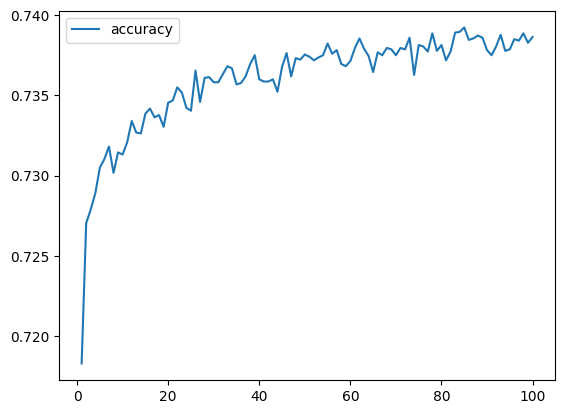

In [ ]:
#Graphing the accuracy for visual representation
history_df_opt_1 = pd.DataFrame(history_opt_1.history, index = range(1, len(history_opt_1.history['loss'])+1))
history_df_opt_1.plot(y = 'accuracy')

# Optimization Trial 2

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_dropped_opt_2 = application_df.drop(columns=['EIN', 'NAME'])

In [ ]:
# Determine the number of unique values in each column.
unique_values_opt_2 = application_df_dropped_opt_2.nunique()

In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts_opt_2 = application_df_dropped_opt_2['APPLICATION_TYPE'].value_counts()
print(application_type_counts_opt_2)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value_type_opt_2 = 1200
application_types_to_replace_opt_2 = application_type_counts_opt_2[application_type_counts_opt_2 < cutoff_value_type_opt_2].index.tolist()

# Replace in dataframe
for app in application_types_to_replace_opt_2:
    application_df_dropped_opt_2['APPLICATION_TYPE'] = application_df_dropped_opt_2['APPLICATION_TYPE'].replace(app,"Other")

print(application_type_counts_opt_2)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classification_counts_opt_2 = application_df_dropped_opt_2['CLASSIFICATION'].value_counts()
# Choosing a cutoff value and create a list of classifications to be replaced
cutoff_value_class_opt_2 = 100
classifications_to_replace_opt_2 = classification_counts_opt_2[classification_counts_opt_2 < cutoff_value_class_opt_2].index.tolist()
# Replace in dataframe
for cls in classifications_to_replace_opt_2:
    application_df_dropped_opt_2['CLASSIFICATION'] = application_df_dropped_opt_2['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df_dropped_opt_2['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`

application_df_dropped_opt_2 = pd.get_dummies(application_df_dropped_opt_2)

In [ ]:
# Split our preprocessed data into our features and target arrays

X = application_df_dropped_opt_2.drop(columns=['IS_SUCCESSFUL'])
y = application_df_dropped_opt_2['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_opt_2 = tf.keras.models.Sequential()

# First hidden layer
nn_opt_2.add(tf.keras.layers.Dense(units=45, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_opt_2.add(tf.keras.layers.Dense(units=25, activation='relu'))

# Output layer
nn_opt_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn_opt_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Check the structure of the model
nn_opt_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 45)                2025      
                                                                 
 dense_13 (Dense)            (None, 25)                1150      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_opt_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history_opt_2 = nn_opt_2.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
686/686 [==============================] - 12s 12ms/step - loss: 0.5893 - accuracy: 0.7053 - val_loss: 0.5581 - val_accuracy: 0.7325
Epoch 2/100
686/686 [==============================] - 6s 9ms/step - loss: 0.5673 - accuracy: 0.7225 - val_loss: 0.5574 - val_accuracy: 0.7314
Epoch 3/100
686/686 [==============================] - 3s 4ms/step - loss: 0.5637 - accuracy: 0.7217 - val_loss: 0.5529 - val_accuracy: 0.7360
Epoch 4/100
686/686 [==============================] - 3s 4ms/step - loss: 0.5614 - accuracy: 0.7227 - val_loss: 0.5539 - val_accuracy: 0.7343
Epoch 5/100
686/686 [==============================] - 3s 4ms/step - loss: 0.5603 - accuracy: 0.7230 - val_loss: 0.5555 - val_accuracy: 0.7352
Epoch 6/100
686/686 [==============================] - 3s 4ms/step - loss: 0.5590 - accuracy: 0.7248 - val_loss: 0.5528 - val_accuracy: 0.7327
Epoch 7/100
686/686 [==============================] - 6s 9ms/step - loss: 0.5593 - accuracy: 0.7245 - val_loss: 0.5544 - val_accuracy: 0.73

In [ ]:
# Evaluate the model using the test data
model_loss_opt_2, model_accuracy_opt_2 = nn_opt_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss_opt_2}, Accuracy: {model_accuracy_opt_2}")

215/215 - 0s - loss: 0.5742 - accuracy: 0.7223 - 317ms/epoch - 1ms/step
Loss: 0.5741932392120361, Accuracy: 0.7223032116889954


<Axes: >

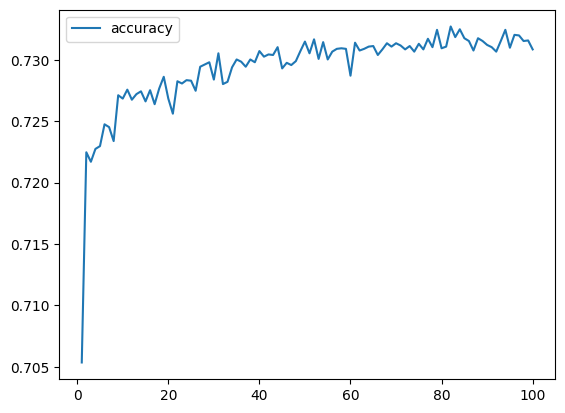

In [ ]:
#Graphing the accuracy for visual representation
history_df_opt_2 = pd.DataFrame(history_opt_2.history, index = range(1, len(history_opt_2.history['loss'])+1))
history_df_opt_2.plot(y = 'accuracy')

# Optimization Trial 3



In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_dropped_opt_3 = application_df.drop(columns=['EIN', 'NAME'])

In [ ]:
# Determine the number of unique values in each column.
unique_values_opt_3 = application_df_dropped_opt_3.nunique()

In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts_opt_3 = application_df_dropped_opt_3['APPLICATION_TYPE'].value_counts()
print(application_type_counts_opt_3)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value_type_opt_3 = 100
application_types_to_replace_opt_3 = application_type_counts_opt_3[application_type_counts_opt_3 < cutoff_value_type_opt_3].index.tolist()

# Replace in dataframe
for app in application_types_to_replace_opt_3:
    application_df_dropped_opt_3['APPLICATION_TYPE'] = application_df_dropped_opt_3['APPLICATION_TYPE'].replace(app,"Other")

print(application_type_counts_opt_3)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classification_counts_opt_3 = application_df_dropped_opt_3['CLASSIFICATION'].value_counts()
# Choosing a cutoff value and create a list of classifications to be replaced
cutoff_value_class_opt_3 = 200
classifications_to_replace_opt_3 = classification_counts_opt_3[classification_counts_opt_3 < cutoff_value_class_opt_3].index.tolist()
# Replace in dataframe
for cls in classifications_to_replace_opt_3:
    application_df_dropped_opt_3['CLASSIFICATION'] = application_df_dropped_opt_3['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df_dropped_opt_3['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: count, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`

application_df_dropped_opt_3 = pd.get_dummies(application_df_dropped_opt_3)

In [ ]:
# Split our preprocessed data into our features and target arrays

X = application_df_dropped_opt_3.drop(columns=['IS_SUCCESSFUL'])
y = application_df_dropped_opt_3['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_opt_3 = tf.keras.models.Sequential()

# First hidden layer
nn_opt_3.add(tf.keras.layers.Dense(units=120, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_opt_3.add(tf.keras.layers.Dense(units=40, activation='tanh'))

# Output layer
nn_opt_3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn_opt_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Check the structure of the model
nn_opt_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 120)               5640      
                                                                 
 dense_16 (Dense)            (None, 40)                4840      
                                                                 
 dense_17 (Dense)            (None, 1)                 41        
                                                                 
Total params: 10521 (41.10 KB)
Trainable params: 10521 (41.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_opt_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history_opt_3 = nn_opt_3.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
686/686 [==============================] - 5s 6ms/step - loss: 0.5702 - accuracy: 0.7187 - val_loss: 0.5471 - val_accuracy: 0.7316
Epoch 2/100
686/686 [==============================] - 3s 4ms/step - loss: 0.5578 - accuracy: 0.7250 - val_loss: 0.5494 - val_accuracy: 0.7367
Epoch 3/100
686/686 [==============================] - 3s 4ms/step - loss: 0.5535 - accuracy: 0.7283 - val_loss: 0.5511 - val_accuracy: 0.7321
Epoch 4/100
686/686 [==============================] - 7s 10ms/step - loss: 0.5516 - accuracy: 0.7279 - val_loss: 0.5487 - val_accuracy: 0.7334
Epoch 5/100
686/686 [==============================] - 5s 7ms/step - loss: 0.5502 - accuracy: 0.7299 - val_loss: 0.5507 - val_accuracy: 0.7289
Epoch 6/100
686/686 [==============================] - 2s 4ms/step - loss: 0.5491 - accuracy: 0.7292 - val_loss: 0.5436 - val_accuracy: 0.7394
Epoch 7/100
686/686 [==============================] - 2s 3ms/step - loss: 0.5487 - accuracy: 0.7314 - val_loss: 0.5446 - val_accuracy: 0.738

In [ ]:
# Evaluate the model using the test data
model_loss_opt_3, model_accuracy_opt_3 = nn_opt_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss_opt_3}, Accuracy: {model_accuracy_opt_3}")

215/215 - 0s - loss: 0.5603 - accuracy: 0.7217 - 407ms/epoch - 2ms/step
Loss: 0.5603495240211487, Accuracy: 0.7217200994491577


<Axes: >

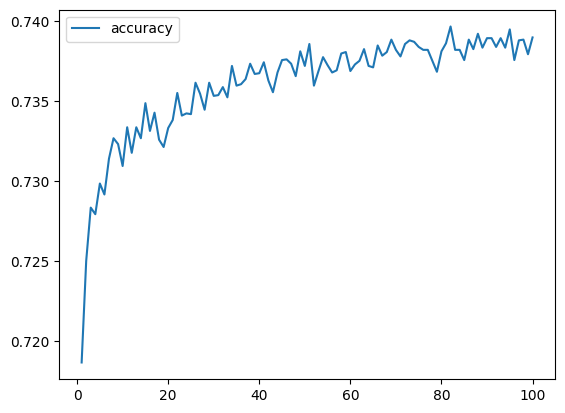

In [ ]:
#Graphing the accuracy for visual representation
history_df_opt_3 = pd.DataFrame(history_opt_3.history, index = range(1, len(history_opt_3.history['loss'])+1))
history_df_opt_3.plot(y = 'accuracy')

# Export Models

In [ ]:
# Export our model to HDF5 file

nn_opt_1.save('AlphabetSoupCharity_Optimizations_1.h5')
nn_opt_2.save('AlphabetSoupCharity_Optimizations_2.h5')
nn_opt_3.save('AlphabetSoupCharity_Optimizations_3.h5')

# Analysis

## First attempt:

Dropping a column that is not beneficial to the prediction

In [ ]:
#application_df = application_df.drop(columns=['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS'])
#application_df

- application_types's cut off = 500
- classification's cut off = 1000
- First Layer units = 80  | activation: relu
- Second Layer units= 30  | activation: relu
- Third layer units = 1   | activation: sigmoid

Accuracy = 0.0.7260932922363281

Moving to the next attempt since 72% ≠ 75%

## Second attempt:

- application_types's cut off = 1200
- classification's cut off = 100
- First Layer units = 45  | activation: relu
- Second Layer units= 25  | activation: relu
- Third layer units = 1   | activation: sigmoid

Accuracy =  0.7227405309677124

Moving on to the third  attempt since 72% ≠ %75


## Third attempt:

- application_types's cut off = 100
- classification's cut off = 200
- First Layer units = 120  | activation: relu
- Second Layer units= 40  | activation: tanh
- Third layer units = 1   | activation: sigmoid

Accuracy =  0.7253644466400146

No luck! Giving up.